In [3]:
from guided_diffusion.bratsloader import BRATSDataset
import torch

data_dir = "./data/training"
ds = BRATSDataset(data_dir, test_flag=True)
datal = torch.utils.data.DataLoader(
        ds,
        batch_size=1,
        shuffle=False)

data = iter(datal)
image, label = next(data)

print(image.shape)
# print(label.shape)

AssertionError: datapoint is incomplete, keys are dict_keys(['flair', 'seg', 't1', 't1ce', 't2'])

In [4]:
torch.unique(image[0][3], sorted=True)

tensor([0.0000, 0.0031, 0.0062, 0.0092, 0.0123, 0.0154, 0.0185, 0.0215, 0.0246,
        0.0277, 0.0308, 0.0338, 0.0369, 0.0400, 0.0431, 0.0462, 0.0492, 0.0523,
        0.0554, 0.0585, 0.0615, 0.0646, 0.0677, 0.0708, 0.0738, 0.0769, 0.0800,
        0.0831, 0.0862, 0.0892, 0.0923, 0.0954, 0.0985, 0.1015, 0.1046, 0.1077,
        0.1108, 0.1138, 0.1169, 0.1200, 0.1231, 0.1262, 0.1292, 0.1323, 0.1354,
        0.1385, 0.1415, 0.1446, 0.1477, 0.1508, 0.1538, 0.1569, 0.1600, 0.1631,
        0.1662, 0.1692, 0.1723, 0.1754, 0.1785, 0.1815, 0.1846, 0.1877, 0.1908,
        0.1938, 0.1969, 0.2000, 0.2031, 0.2062, 0.2092, 0.2123, 0.2154, 0.2185,
        0.2215, 0.2246, 0.2277, 0.2308, 0.2338, 0.2369, 0.2400, 0.2431, 0.2462,
        0.2492, 0.2523, 0.2554, 0.2585, 0.2615, 0.2646, 0.2677, 0.2708, 0.2738,
        0.2769, 0.2800, 0.2831, 0.2862, 0.2892, 0.2923, 0.2954, 0.2985, 0.3015,
        0.3046, 0.3077, 0.3108, 0.3138, 0.3169, 0.3200, 0.3231, 0.3262, 0.3292,
        0.3323, 0.3354, 0.3385, 0.3415, 

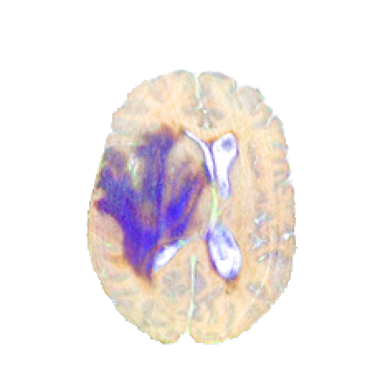

In [5]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Create a sample tensor (replace this with your tensor)
# In this example, we assume it's a 4-channel (e.g., RGBA) image
sample_tensor = image[0]

# Define a transform to convert the tensor to an image
to_pil = transforms.ToPILImage()

# Convert the tensor to a PIL Image
image = to_pil(sample_tensor)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


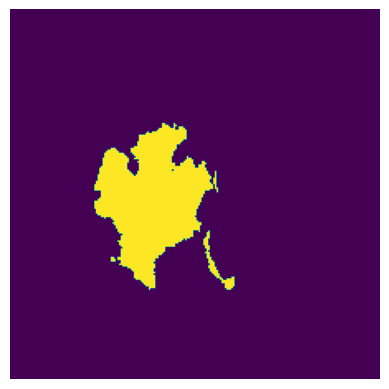

In [6]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Create a sample tensor (replace this with your tensor)
# In this example, we assume it's a 4-channel (e.g., RGBA) image
sample_tensor = label[0]

# Define a transform to convert the tensor to an image
to_pil = transforms.ToPILImage()

# Convert the tensor to a PIL Image
image = to_pil(sample_tensor)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


In [7]:
img = Image.open("./../data/Modified_Image/0001_NI000_slice000.png")
output_image = Image.new("RGB", img.size)
output_image.paste(img, (0, 0))
output_image.size

(512, 512)

In [70]:
preprocess = transforms.ToTensor()

# Apply the transformation to the image
tensor = preprocess(output_image)
tensor.shape

torch.Size([3, 512, 512])

In [44]:
img2 = Image.open("./../data/Modified_Mask/0001_MA000_slice000.png")
preprocess = transforms.ToTensor()
tensor = preprocess(img2)
tensor.shape

torch.Size([1, 512, 512])

In [4]:
from guided_diffusion.bratsloader import BRATSDataset
import torch

data_dir = "./data/testing/"
ds = BRATSDataset(data_dir, test_flag=True)
datal = torch.utils.data.DataLoader(
        ds,
        batch_size=1,
        shuffle=True)

data = iter(datal)
image, label = next(data)

print(image[0].shape)
print(label)

torch.Size([4, 224, 224])
('./data/testing/001919\\brats_train_040_flair_087_w.nii.gz',)


In [41]:
img = Image.open("./../data/Modified_Image/0001_NI000_slice000.png")
resized = img.resize((256, 256), Image.Resampling.LANCZOS)

output_image = Image.new("RGB", (256, 256))
output_image.paste(resized, (0, 0))
preprocess = transforms.Compose([transforms.ToTensor()])

# Apply the transformation to the image
tensor = preprocess(output_image)
tensor = tensor.type(torch.FloatTensor)
tensor.shape

torch.Size([3, 256, 256])

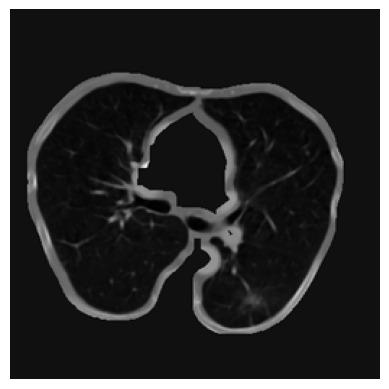

In [42]:
to_pil = transforms.ToPILImage()

# Convert the tensor to a PIL Image
image = to_pil(tensor)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()
